<a href="https://colab.research.google.com/github/Preciousosas/Stage-C/blob/main/Telco_Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [2]:
churn_data = pd.read_csv('/content/drive/MyDrive/Hamoye/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Data Processing**

In [5]:
# Check for null values
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#Convert TotalCharges to numeric
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

*errors='coerce'* was used to convert non-numeric values to NaN values instead of showing error

In [7]:
# Fill the null values in TotalCharge with 0
churn_data['TotalCharges'].fillna(0, inplace=True)

In [8]:
# Check the Churn Variation count
churn_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# **Feature Enginnering**

In [9]:
#Convert the 'Churn' column to binary values, where 'No' is mapped to 0 and 'Yes' is mapped to 1
churn_data['Churn'] = churn_data['Churn'].map({'No': 0, 'Yes': 1})

In [10]:
Y = churn_data['Churn']

Set Churn Column as your targeted label (Y)

In [11]:
# Group columns based on datatype
categorical_columns = churn_data.select_dtypes(include =['object'])
categorical_columns.drop(columns=['customerID'],axis = 1,inplace = True)
numeric_columns = churn_data[['TotalCharges','MonthlyCharges','tenure']]

In [12]:
# Perform OneHotEncode to the categorical columns

#Initalize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Transform the categorical columns using one-hot-encoder
categorical_column_encoded = encoder.fit_transform(categorical_columns)

#Create a DataFrame with the one-hot encoded columns
categorical_column_encoded_df = pd.DataFrame(categorical_column_encoded,
                                             columns=encoder.get_feature_names_out())


In [13]:
# Standardize the numeric columns
scaler = StandardScaler()
numeric_column_transformed = scaler.fit_transform(numeric_columns)
numeric_column_scaled = pd.DataFrame(numeric_column_transformed, columns = numeric_columns.columns)

In [14]:
# Concat the two dataframes the numeric and categorical
X = pd.concat([categorical_column_encoded_df, numeric_column_scaled], axis=1)

Set the concat dataframe as your X label

# **MODEL BUILDING**

In [15]:
# Train_Test_Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=1)
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [18]:
# Create an instance of the RFClassifier
rf_clf = RandomForestClassifier(random_state=1)

# Fit the model to the training data
rf_clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [19]:
# Create an instance of the XGBClassifier
xgb_classifier = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
xgb_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [20]:
# Create an instance of the LGBMClassifier
lgbc = LGBMClassifier(random_state=1)

# Fit the model to the training data
lgbc.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lgbc.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1521, number of negative: 4113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.269968 -> initscore=-0.994785
[LightGBM] [Info] Start training from score -0.994785
Accuracy: 0.80


In [21]:
# Create an instance of the ETClassifier
extra_tree_forest = ExtraTreesClassifier(random_state=1)

# Training the model
extra_tree_forest.fit(x_train, y_train)

# Make predictions on the test set
y_pred = extra_tree_forest.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


In [22]:
# Using RandomizedSearchCV on ETClassifier

n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

# Setting the hyperparameters for ETClassifier
hyperparameter_grid = {'n_estimators': [50, 100, 300, 500, 1000],
                       'min_samples_leaf': [2, 3, 5, 7, 9],
                       'min_samples_split': [1, 2, 4, 6, 8],
                       'max_features': ['auto', 'sqrt', 'log2', None]}

# Initalize an intance
ETC = ExtraTreesClassifier()

random_ETC = RandomizedSearchCV(estimator = ETC,param_distributions=hyperparameter_grid,
                               cv=5, n_iter=10, scoring = 'accuracy',
                                n_jobs = -1, verbose = 1, random_state = 1)

# Train the model
random_ETC.fit(x_train, y_train)

# prinit the needed results
print(" Results from Random Search " )
print("\n The best score across ALL searched params:\n", random_ETC.best_score_)
print("\n The best parameters across ALL searched params:\n", random_ETC.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Random Search 

 The best score across ALL searched params:
 0.7921533614604231

 The best parameters across ALL searched params:
 {'n_estimators': 1000, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': 'sqrt'}


There was a slight difference in the accuracy of both models (ExtraTreesClassifier plain and the ExtraTreesClassifier hyperparmaters selected by RandomSearchCV)

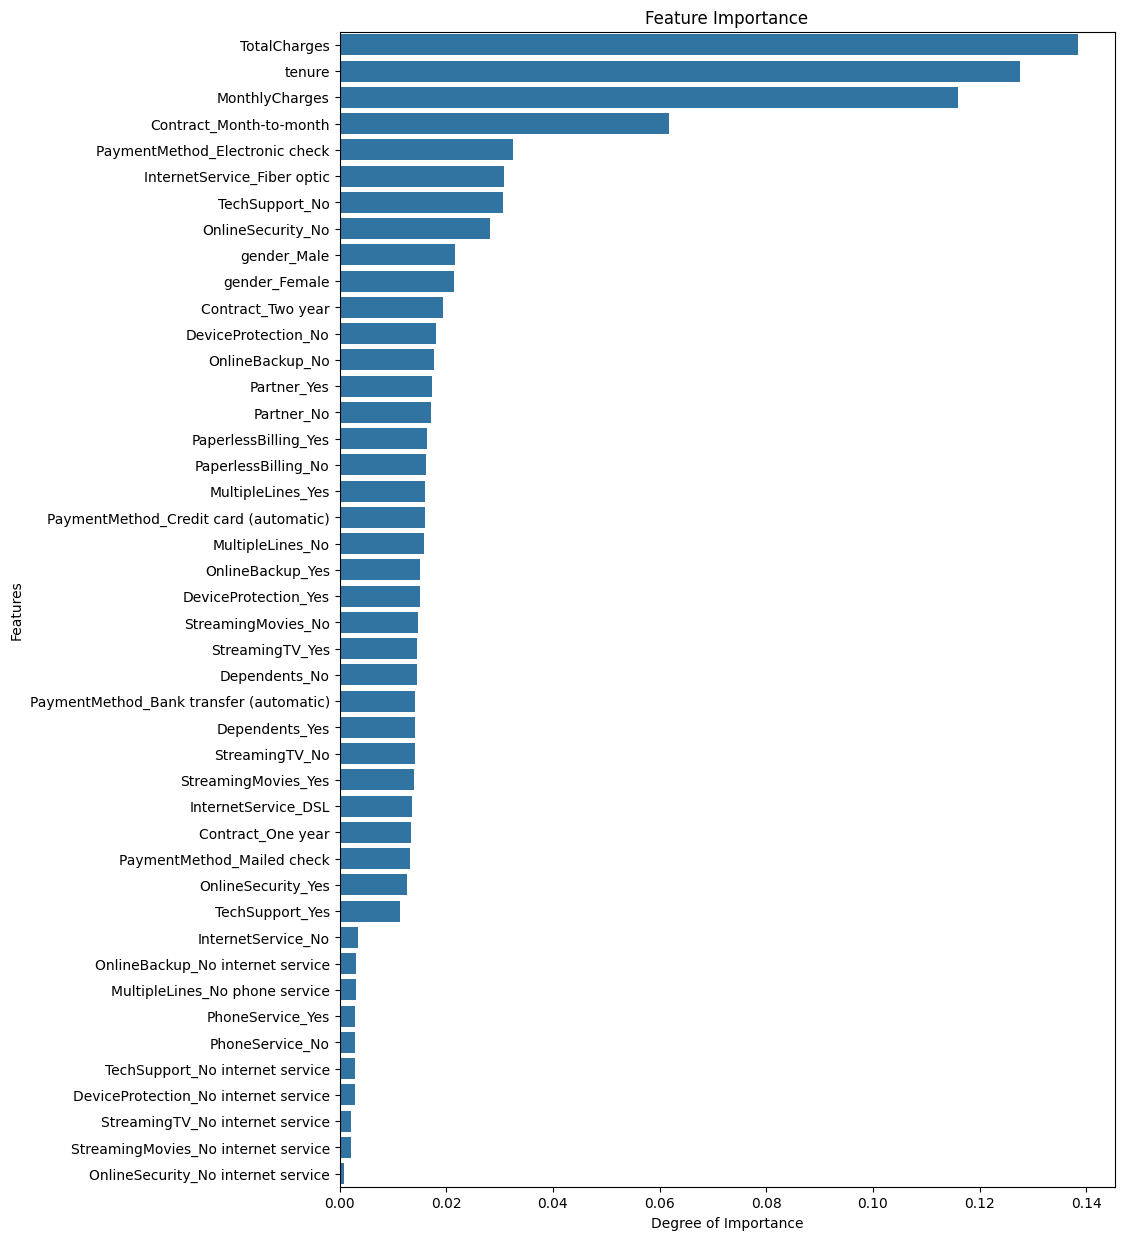

In [31]:
# Find the feature importance using the optimal ExtraTreesClassifier model
feature_importances = extra_tree_forest.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# plot the importance_df
plt.figure(figsize=(10, 15))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Degree of Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

Using seaborn gave a better plot than matplotlib